In [1]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from mrcnn.utils import Dataset
from matplotlib import pyplot as plt

from mrcnn.config import Config
from mrcnn.model import MaskRCNN


from mrcnn import model as modellib, utils

Using TensorFlow backend.


In [2]:
from mrcnn.config import Config
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn.utils import compute_ap
from numpy import expand_dims
from numpy import mean
from matplotlib.patches import Rectangle

In [3]:
# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "pakaian_cfg"
	# number of classes (background + Blue Marbles + Non Blue marbles)
	NUM_CLASSES = 1 + 3
	# Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
 

In [4]:
# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		# load image, bounding boxes and masks for the image id
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = mean(APs)
	return mAP

In [5]:
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='C:/Users/judit/Downloads/coba/Mask-RCNN-TF2', config=cfg)
# load model weights
model.load_weights('C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/mask_rcnn_model_cfg_0006.h5', by_name=True)
# evaluate model on training dataset
# train_mAP = evaluate_model(dataset_train, model, cfg)
# print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
# test_mAP = evaluate_model(dataset_train, model, cfg)
# print("Test mAP: %.3f" % test_mAP)

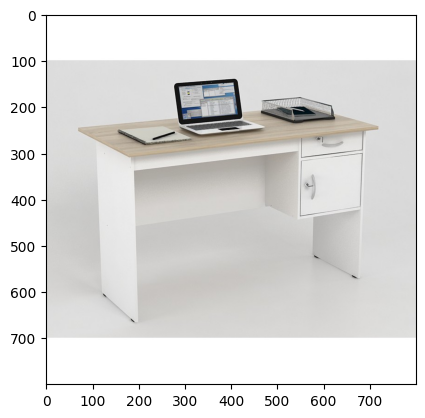

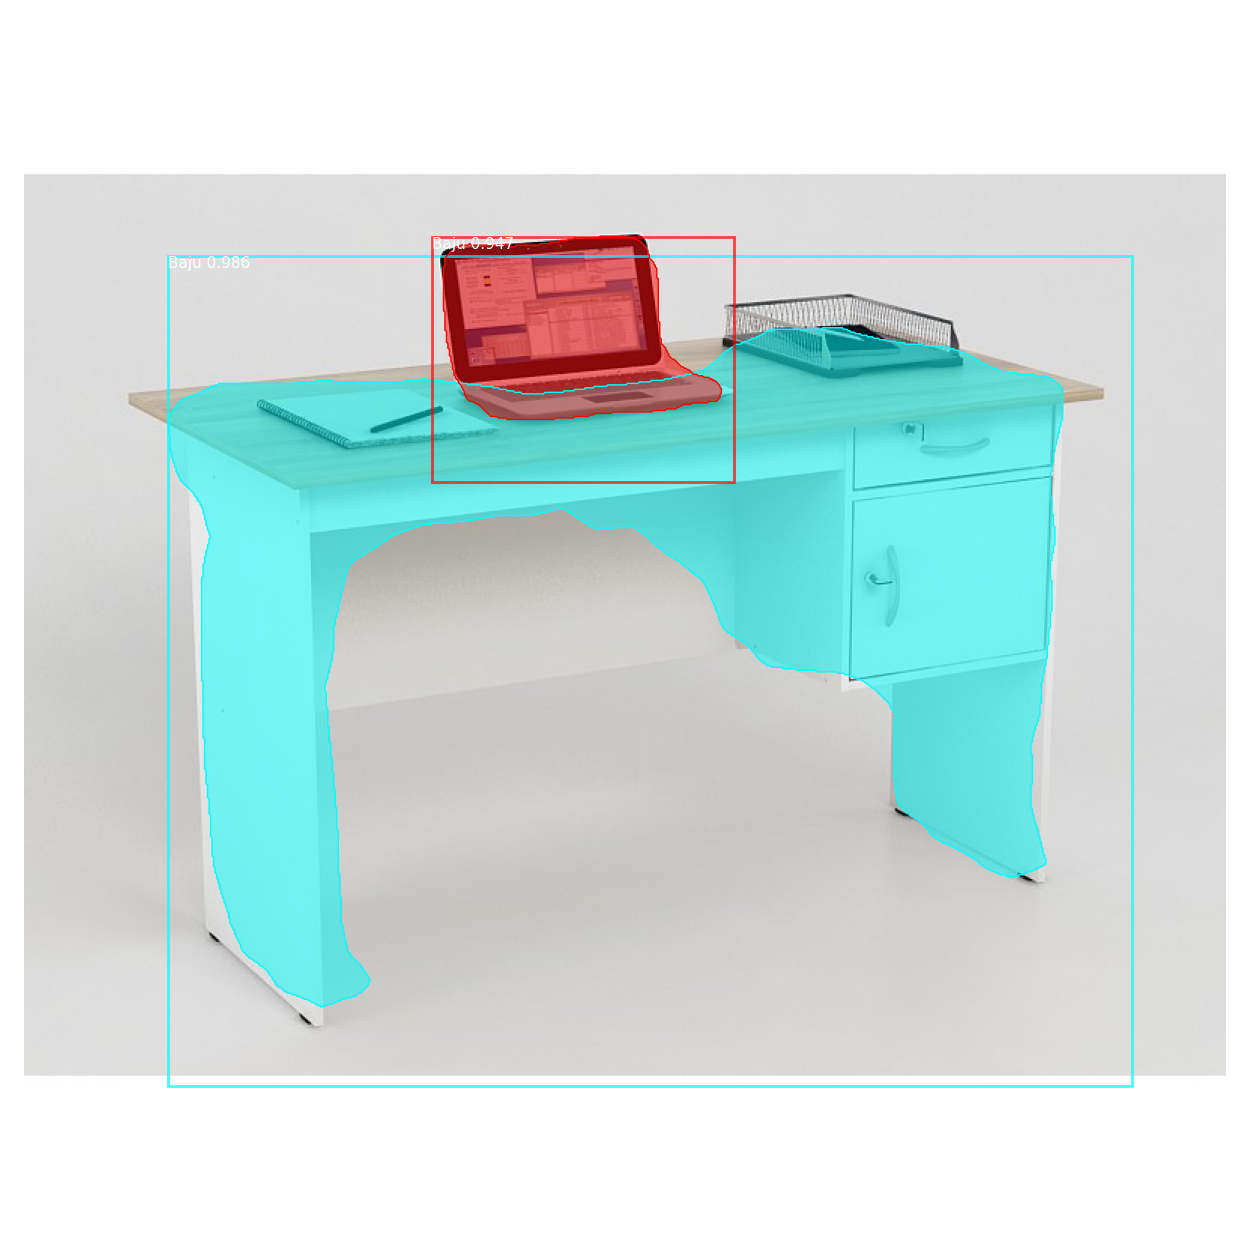

In [9]:
#Test on a single image
marbles_img = skimage.io.imread("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset_meja/val/test3.jpg")
plt.imshow(marbles_img)

detected = model.detect([marbles_img])
results = detected[0]
class_names = ['BG', 'Topi', 'Baju', 'Meja']
display_instances(marbles_img, results['rois'], results['masks'], 
                   results['class_ids'], class_names, results['scores'])